### Goal: Use Support Vector Machine (SVM) to predict whether a user will purchase based on age and estimated salary.


,Kernel,Accuracy,Precision,Recall,F1 Score
0,linear,0.86,0.93,0.68,0.78
1,poly,0.85,1.00,0.59,0.75
2,rbf,0.93,0.86,0.97,0.91
3,sigmoid,0.71,0.62,0.57,0.59


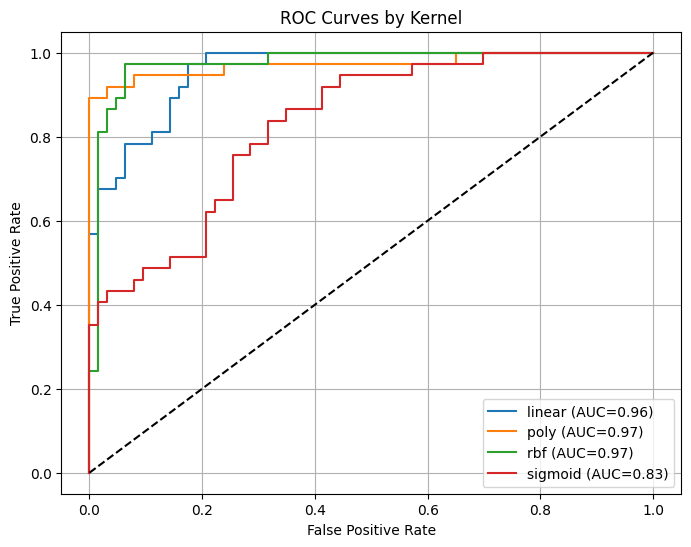

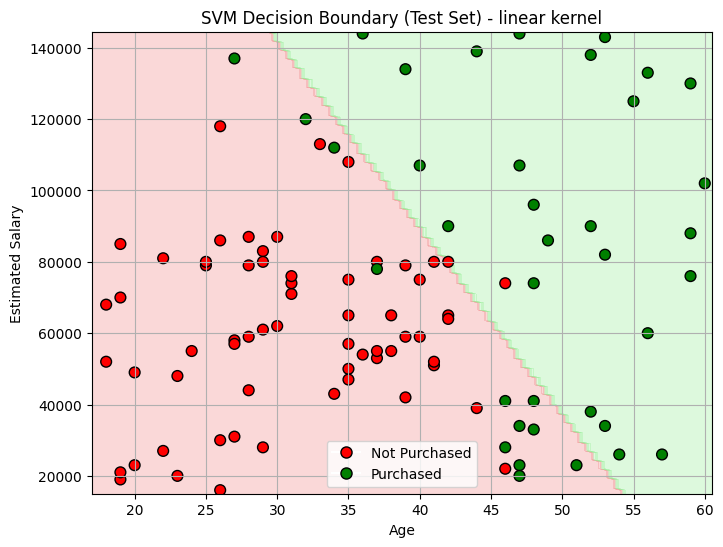

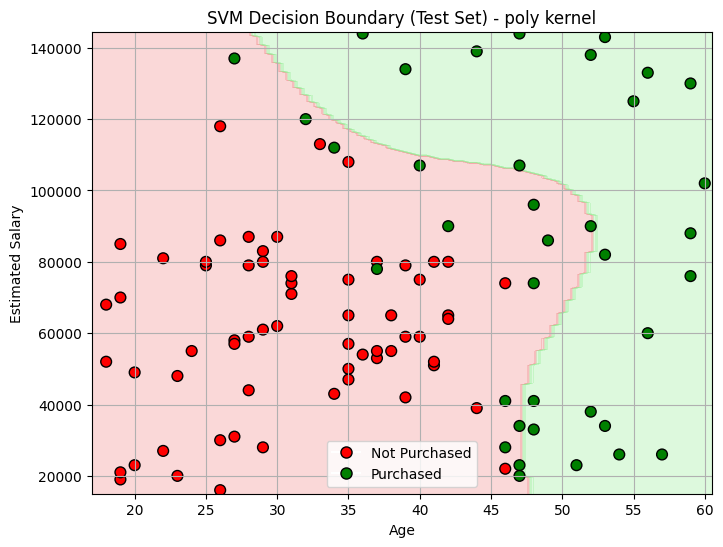

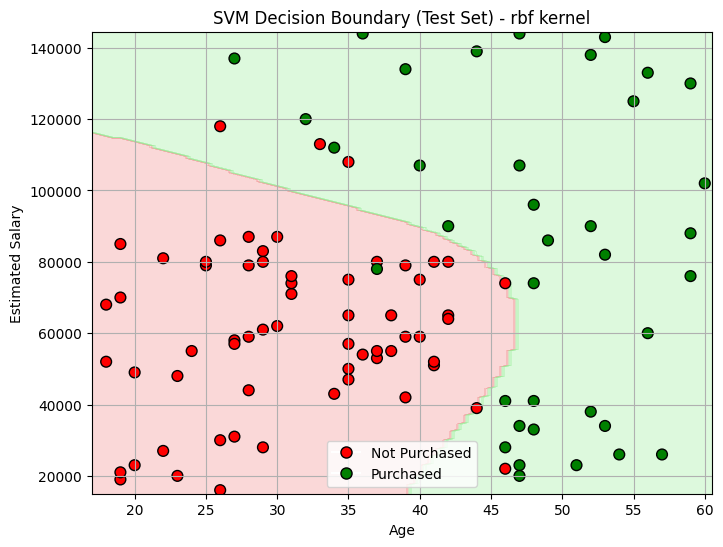

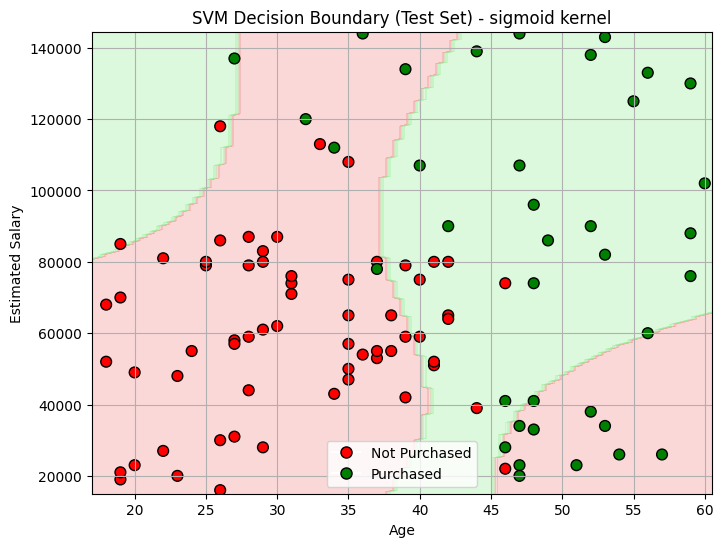

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load dataset
dataset = pd.read_csv('../datasets/social-network-ads.csv')

# split into features and target
X = dataset.iloc[:, :-1].values  # Features: Age, EstimatedSalary
y = dataset.iloc[:, -1].values  # Target: Purchased

# split into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = []

for kernel in kernels:
    svc = SVC(kernel=kernel, probability=True, random_state=42)
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    
    results.append({
        'Kernel':      kernel,
        'Accuracy':    accuracy_score(y_test, y_pred),
        'Precision':   precision_score(y_test, y_pred, zero_division=0),
        'Recall':      recall_score(y_test, y_pred, zero_division=0),
        'F1 Score':    f1_score(y_test, y_pred, zero_division=0)
    })

# Display comparison table
import pandas as pd
metrics_df = pd.DataFrame(results)
metrics_df = metrics_df.round(2)
display(metrics_df)

# Plot ROC curves for each kernel
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(8,6))
for kernel in kernels:
    svc = SVC(kernel=kernel, probability=True, random_state=42).fit(X_train, y_train)
    y_proba = svc.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{kernel} (AUC={auc:.2f})')

plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves by Kernel')
plt.legend()
plt.grid(True)
plt.show()

from matplotlib.colors import ListedColormap

def plot_svm_decision_boundary(X_scaled, y, model, scaler, title):
    # Inverse transform to original scale for plotting
    X_orig = scaler.inverse_transform(X_scaled)
    x_min, x_max = X_orig[:, 0].min() - 1, X_orig[:, 0].max() + 1
    y_min, y_max = X_orig[:, 1].min() - 1000, X_orig[:, 1].max() + 1000

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.5),
        np.arange(y_min, y_max, 500)
    )
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_scaled = scaler.transform(grid)
    Z = model.predict(grid_scaled).reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['lightcoral', 'lightgreen']))
    plt.scatter(X_orig[:, 0], X_orig[:, 1], c=y, cmap=ListedColormap(['red', 'green']), edgecolor='k', s=60)
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.title(title)
    plt.legend(handles=[
        plt.Line2D([0], [0], marker='o', color='w', label='Not Purchased', markerfacecolor='red', markersize=8, markeredgecolor='k'),
        plt.Line2D([0], [0], marker='o', color='w', label='Purchased', markerfacecolor='green', markersize=8, markeredgecolor='k')
    ])
    plt.grid(True)
    plt.show()

# Visualize decision boundaries for each kernel on the test set
for kernel in kernels:
    svc = SVC(kernel=kernel, probability=True, random_state=42)
    svc.fit(X_train, y_train)
    plot_svm_decision_boundary(X_test, y_test, svc, scaler, f"SVM Decision Boundary (Test Set) - {kernel} kernel")  

